# CLASSIFICATION OF DIABETES DATABASE USING ARTIFICIAL NEURAL NETWORKS

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Diabetes.tsv', sep='\t') #datasetin okunması
dataset.head()

,Preg,GLU,BP,ST,INS,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Preg     768 non-null    int64  
 1   GLU      768 non-null    int64  
 2   BP       768 non-null    int64  
 3   ST       768 non-null    int64  
 4   INS      768 non-null    int64  
 5   BMI      768 non-null    float64
 6   DPF      768 non-null    float64
 7   Age      768 non-null    int64  
 8   Outcome  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.isnull().sum() #boş data kontorlü

Preg       0
GLU        0
BP         0
ST         0
INS        0
BMI        0
DPF        0
Age        0
Outcome    0
dtype: int64

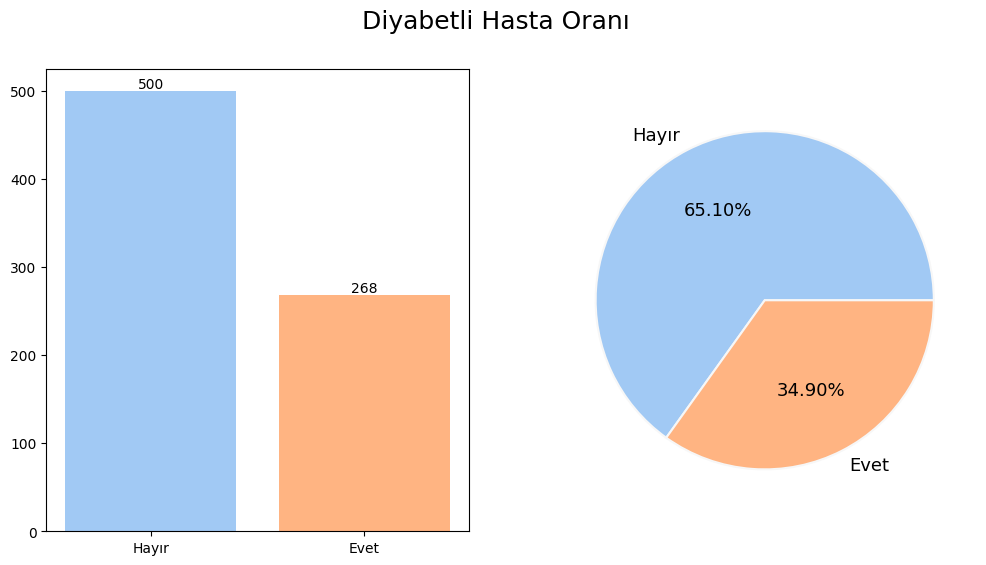

In [6]:
#renk paleti 
pastel_colors = sns.color_palette("pastel")

# Grafik başlığı konumuayarlama 
f, ax = plt.subplots(1, 2, figsize=(12, 6))
f.suptitle("Diyabetli Hasta Oranı", fontsize=18.)

# Çubuk grafiğini çizme ve üzerine değer yazmdırma
outcome_counts = dataset.Outcome.value_counts()
bars = ax[0].bar(outcome_counts.index, outcome_counts.values, color=pastel_colors[:2])

# x eksenindeki konum ve etiket ayarlama
ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["Hayır", "Evet"], rotation=0)

# Her çubuk için değeri yazdırma
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')

# Pasta grafiği çizdirme
_ = outcome_counts.plot.pie(labels=("Hayır", "Evet"), autopct="%.2f%%", label="", fontsize=13., ax=ax[1], colors=pastel_colors[:2], wedgeprops={"linewidth": 1.5, "edgecolor": "#F7F7F7"})

# Pasta grafiğinin labellarının siyah yapılması
for text in ax[1].texts:
    text.set_color("black")

plt.show()


<AxesSubplot: xlabel='DPF', ylabel='Count'>

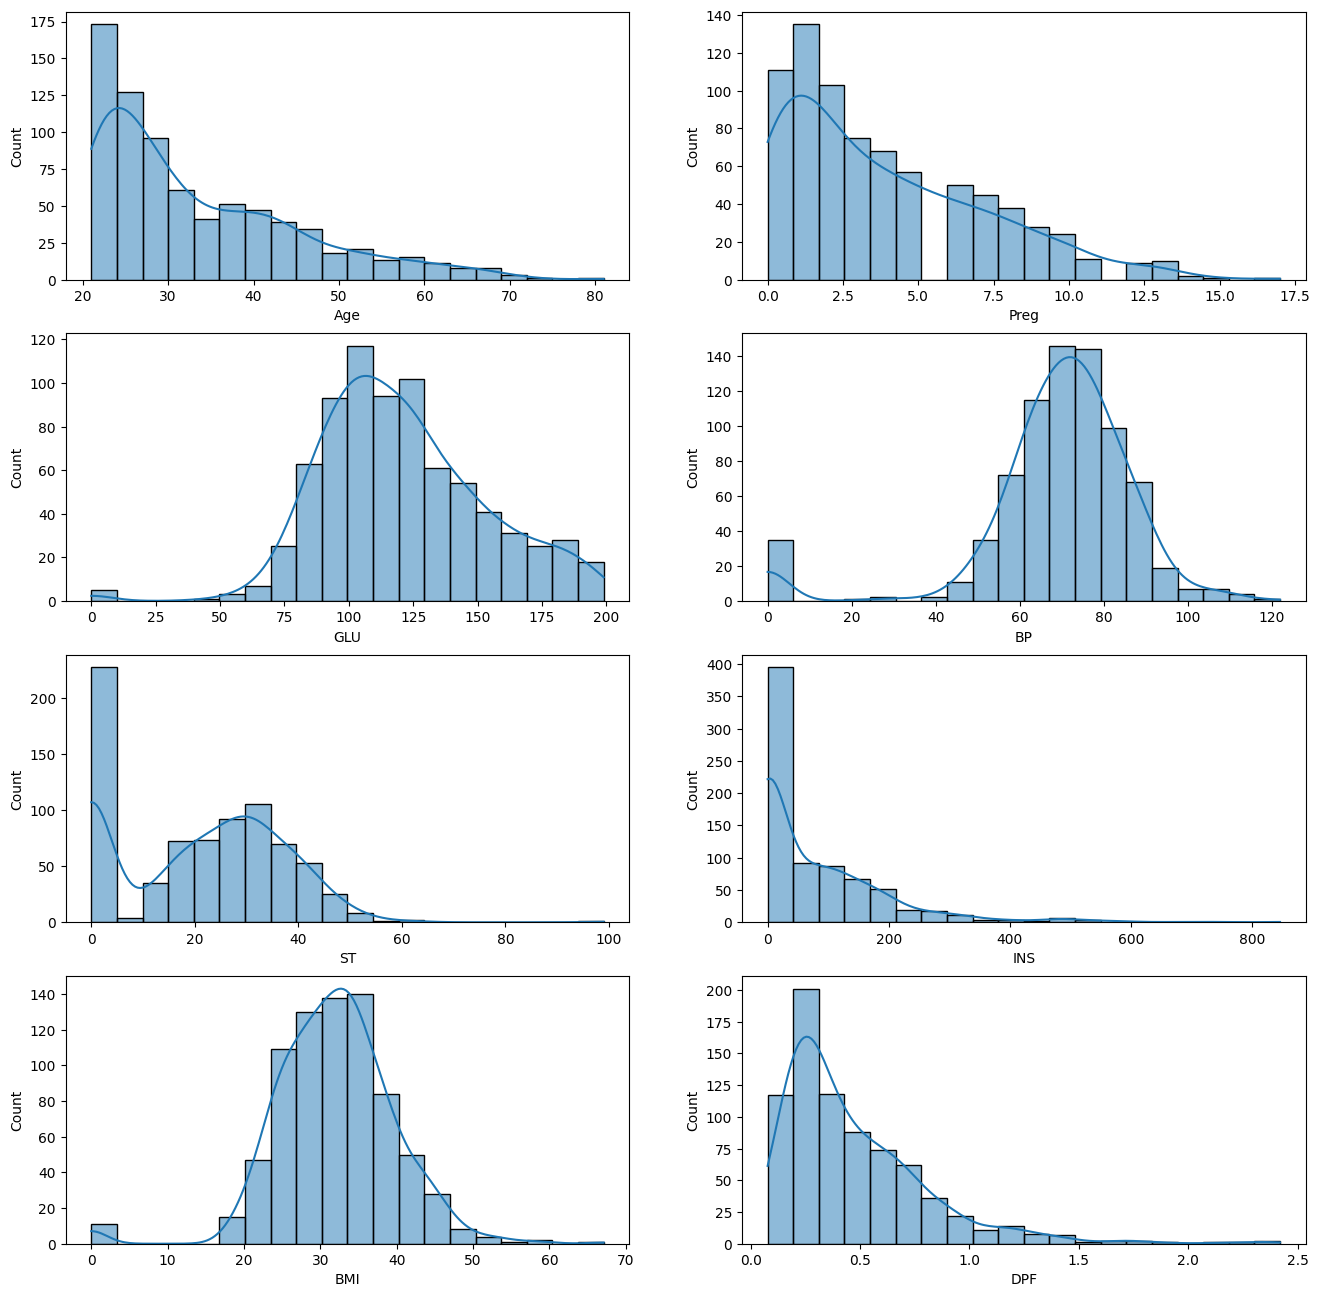

In [9]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(dataset.Age, bins = 20, ax=ax[0,0], kde = True) 
sns.histplot(dataset.Preg, bins = 20, ax=ax[0,1], kde = True) 
sns.histplot(dataset.GLU, bins = 20, ax=ax[1,0], kde = True) 
sns.histplot(dataset.BP, bins = 20, ax=ax[1,1], kde = True) 
sns.histplot(dataset.ST, bins = 20, ax=ax[2,0], kde = True)
sns.histplot(dataset.INS, bins = 20, ax=ax[2,1], kde = True)
sns.histplot(dataset.BMI, bins = 20, ax=ax[3,0], kde = True) 
sns.histplot(dataset.DPF, bins = 20, ax=ax[3,1], kde = True) 

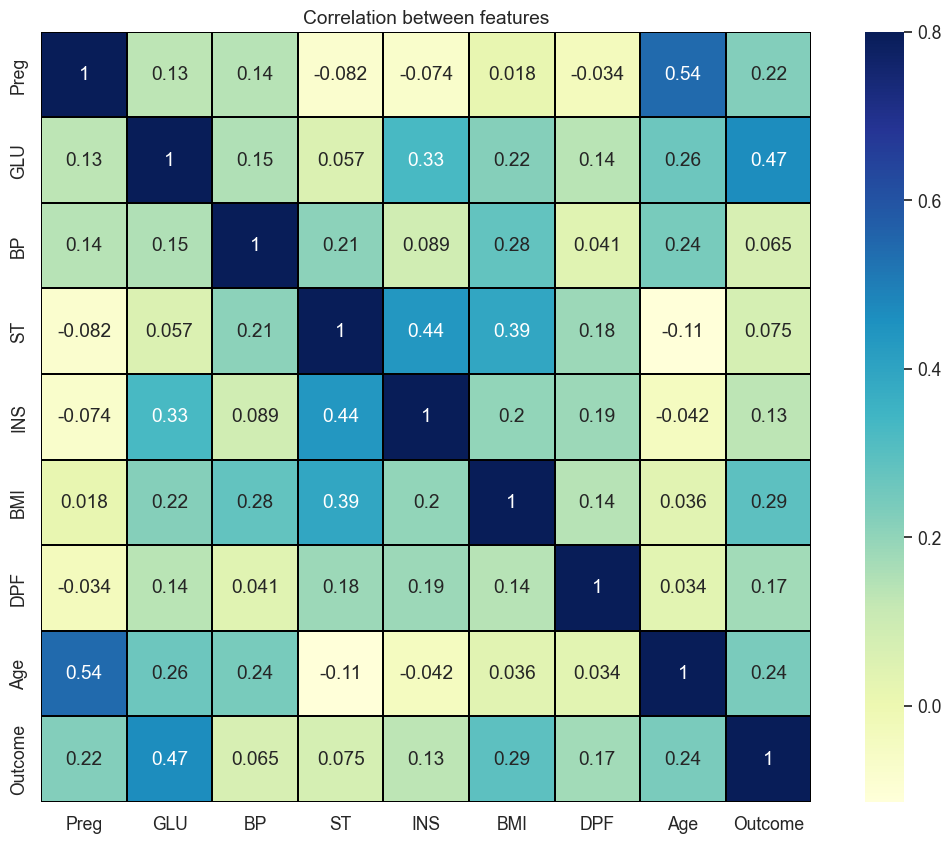

In [10]:
corr=dataset.corr()

sns.set(font_scale=1.15)
plt.figure(figsize=(14, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="black")
plt.title('Correlation between features');

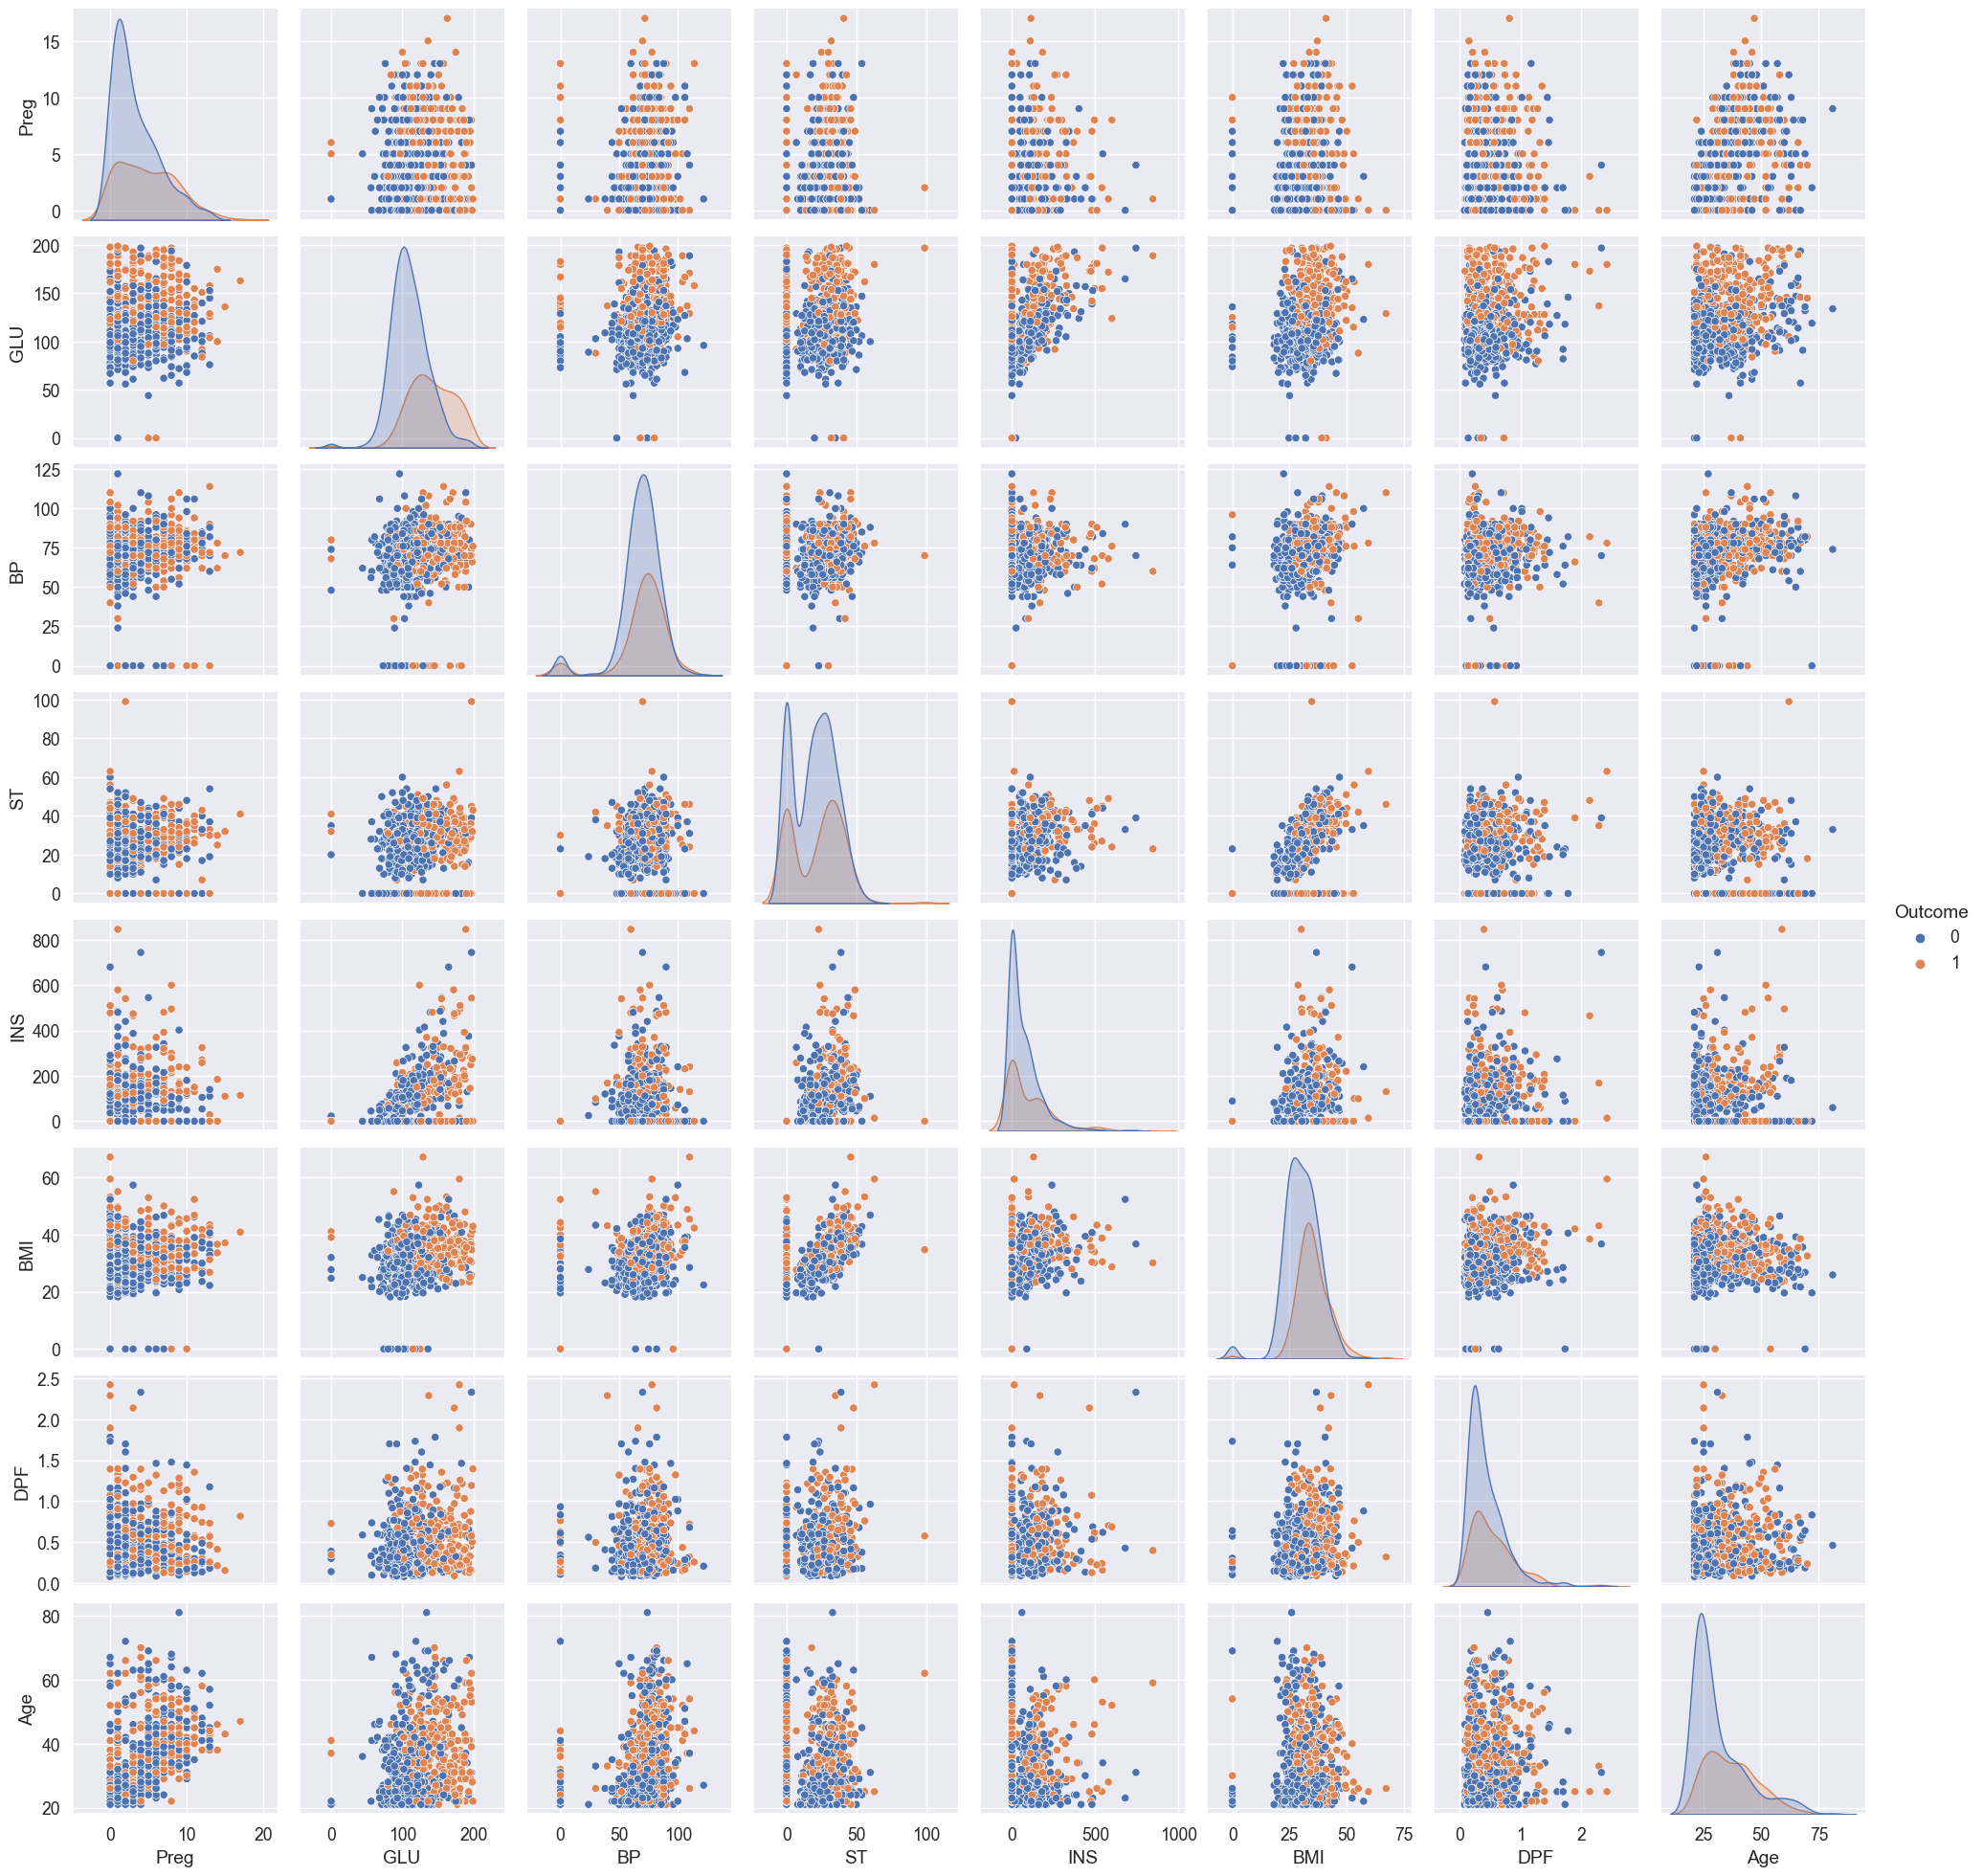

In [11]:
sns.pairplot(data=dataset, hue='Outcome')
plt.show()

In [12]:
x = dataset.iloc[:,0:8].values
y = dataset.iloc[:, -1].values

In [13]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [14]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [15]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# x = sc.fit_transform(x)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [16]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [17]:
x.shape

(768, 8)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=12)

In [19]:
x_test.shape

(154, 8)

In [20]:
y_test.shape

(154,)

In [21]:
model = Sequential()
model.add(Dense(32, input_dim=8, activation='sigmoid'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 961 (3.75 KB)
Trainable params: 961 (3.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


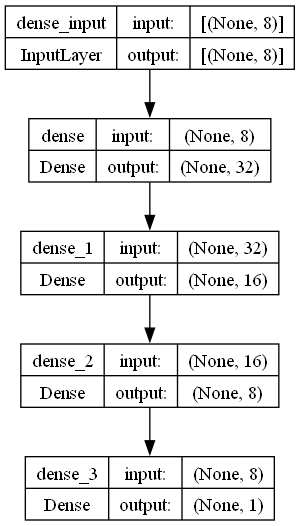

In [23]:
from tensorflow.keras.utils import plot_model

#modelin şemasını çizdirme
plot_model(model, show_shapes=True, show_layer_names=True)


In [24]:
hist = model.fit(x_train,y_train, epochs =100,validation_data=(x_test, y_test))

Epoch 1/100


20/20 [==============================] - 1s 10ms/step - loss: 0.6618 - accuracy: 0.6042 - val_loss: 0.6284 - val_accuracy: 0.6494
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.6547 - val_loss: 0.6112 - val_accuracy: 0.6494
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5964 - accuracy: 0.6645 - val_loss: 0.5942 - val_accuracy: 0.6623
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5784 - accuracy: 0.7036 - val_loss: 0.5732 - val_accuracy: 0.6948
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5586 - accuracy: 0.7182 - val_loss: 0.5502 - val_accuracy: 0.7273
Epoch 6/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5364 - accuracy: 0.7508 - val_loss: 0.5193 - val_accuracy: 0.7662
Epoch 7/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5143 - accuracy: 0.7524 - val_loss: 0.5020 - val_accuracy: 0.7857
Epoch 8/10

In [25]:
# Train and Test accuracy
scores = model.evaluate(x_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.7866
Training Accuracy: 78.66%

5/5 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.8182
Testing Accuracy: 81.82%



In [26]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

5/5 [==============================] - 0s 1ms/step
[[0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[93  6]
 [22 33]]


0.8181818181818182

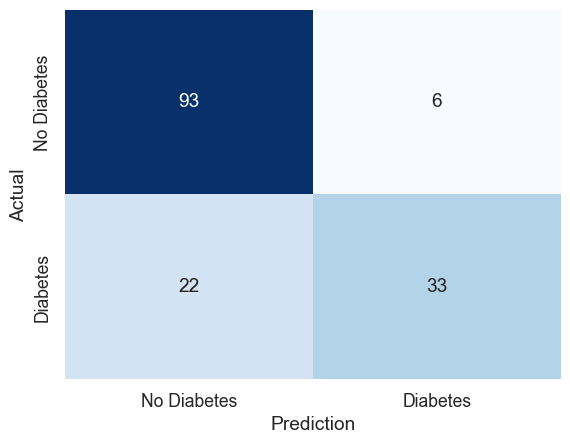

In [28]:
ax = sns.heatmap(cm, annot=True, xticklabels=["No Diabetes",'Diabetes'], yticklabels=['No Diabetes','Diabetes'],
                cbar=False,cmap='Blues')
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

In [29]:
acc = hist.history['accuracy']
loss = hist.history['loss'] 

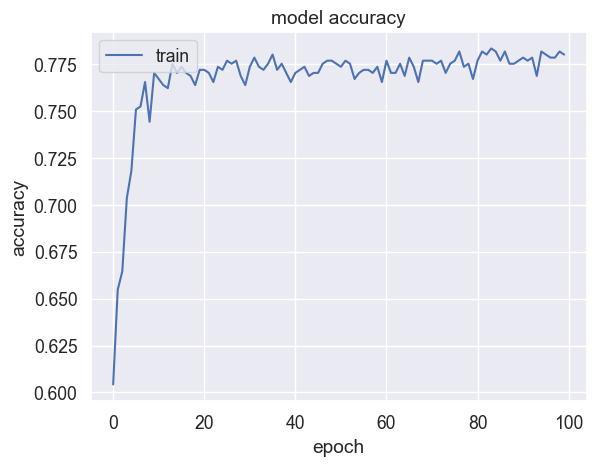

<Figure size 640x480 with 0 Axes>

In [30]:
from matplotlib import pyplot as plt
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('accuracy_curve.png')

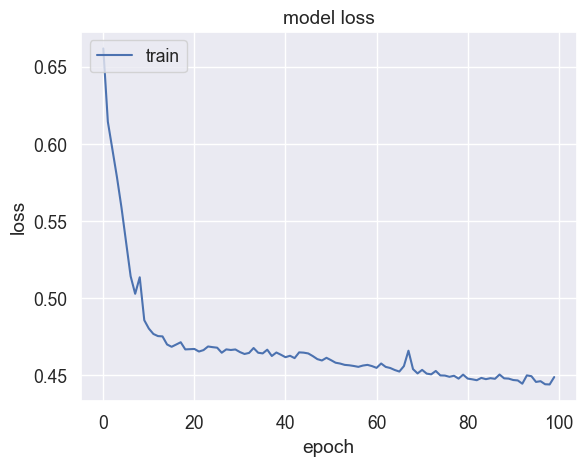

<Figure size 640x480 with 0 Axes>

In [31]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
plt.savefig('loss_curve.png')


Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 0.6633 - accuracy: 0.6482 - val_loss: 0.6472 - val_accuracy: 0.6494
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6276 - accuracy: 0.6661 - val_loss: 0.6145 - val_accuracy: 0.6818
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.6857 - val_loss: 0.5801 - val_accuracy: 0.6883
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.7003 - val_loss: 0.5534 - val_accuracy: 0.7273
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7166 - val_loss: 0.5363 - val_accuracy: 0.7532
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5019 - accuracy: 0.7329 - val_loss: 0.5234 - val_accuracy: 0.7662
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.4859 - accuracy: 0.7378 - val_loss: 0.5161 - val_accuracy: 0.7857
Epoch 8/100
2

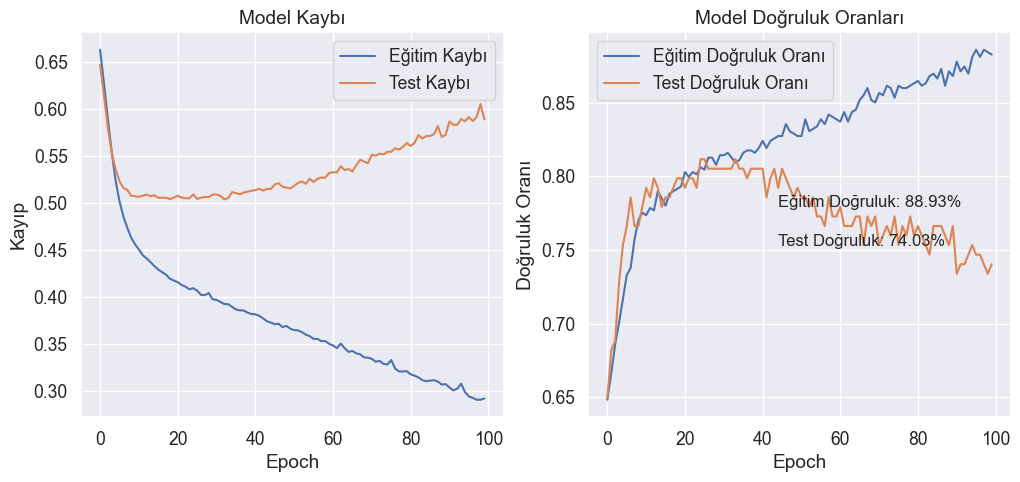

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('Diabetes.tsv', sep='\t') #datasetin okunması

x = dataset.iloc[:,0:8].values
y = dataset.iloc[:, -1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=12)


model = Sequential()
model.add(Dense(32, input_dim=8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train,y_train, epochs =100,validation_data=(x_test, y_test))

scores = model.evaluate(x_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(x_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))


acc = hist.history['accuracy']
loss = hist.history['loss'] 

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Eğitim Kaybı')
plt.plot(hist.history['val_loss'], label='Test Kaybı')
plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend()
     
plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Eğitim Doğruluk Oranı')
plt.plot(hist.history['val_accuracy'], label='Test Doğruluk Oranı')
plt.title('Model Doğruluk Oranları')
plt.ylabel('Doğruluk Oranı')
plt.xlabel('Epoch')
scores = model.evaluate(x_train,y_train)
plt.text(0.45, 0.5, "Eğitim Doğruluk: %.2f%%\n" % (scores[1]*100), transform=plt.gca().transAxes, fontsize=12)
scores = model.evaluate(x_test,y_test)
plt.text(0.45, 0.4, "Test Doğruluk: %.2f%%\n" % (scores[1]*100), transform=plt.gca().transAxes, fontsize=12)


plt.legend()
plt.show()




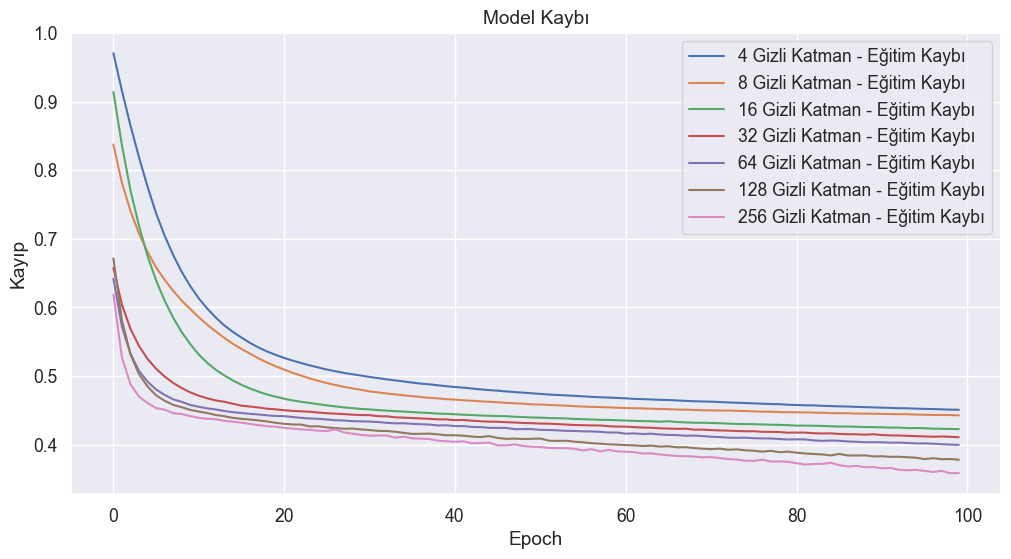

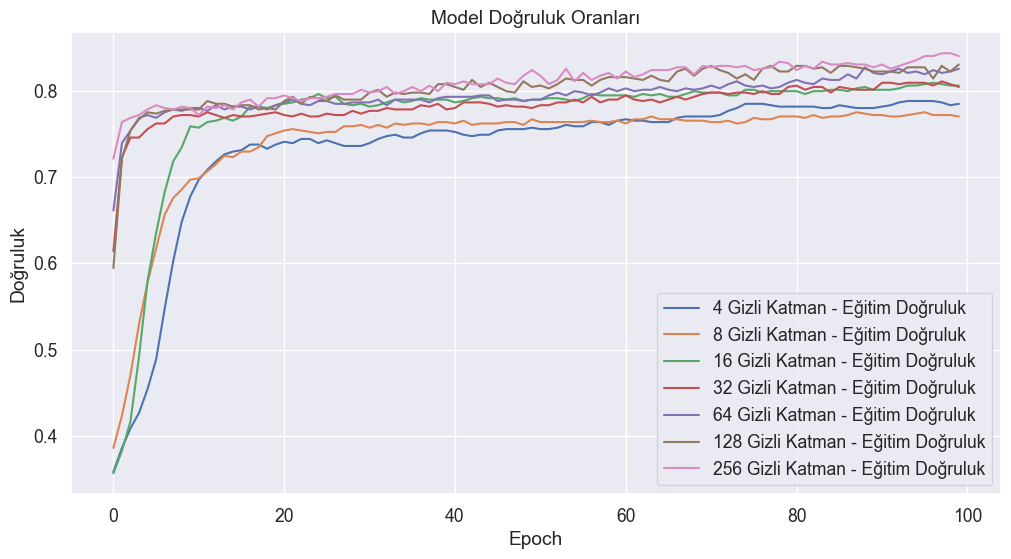

     Eğitim Doğruluk Oranı  Test Doğruluk Oranı
4                 0.785016             0.779221
8                 0.770358             0.772727
16                0.806189             0.818182
32                0.804560             0.811688
64                0.825733             0.824675
128               0.830619             0.798701
256               0.840391             0.798701


In [34]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import visualkeras


dataset = pd.read_csv('Diabetes.tsv', sep='\t') #datasetin okunması


x = dataset.iloc[:,0:8].values
y = dataset.iloc[:, -1].values

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=12)


def train_and_evaluate_model(hidden_layer_size):
    model = Sequential()
    model.add(Dense(hidden_layer_size, input_dim=8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test), verbose=0)

    training_acc = hist.history['accuracy'][-1]
    testing_acc = hist.history['val_accuracy'][-1]
    
    return training_acc, testing_acc, hist.history

# Farklı katman boyutları için model eğitimi
hidden_layer_sizes = [4, 8, 16, 32, 64, 128, 256]
results = {}
histories = {}

for size in hidden_layer_sizes:
    training_acc, testing_acc, history = train_and_evaluate_model(size)
    results[size] = {'Eğitim Doğruluk Oranı': training_acc, 'Test Doğruluk Oranı': testing_acc}
    histories[size] = history

# Sonuçların DataFrame'e dönüştürülmesi
results_df = pd.DataFrame(results).T



# Sonuçların ve eğitim grafiklerinin çizdirilmesi
plt.figure(figsize=(12, 6))

# Kayıp grafikleri
for size, history in histories.items():
    plt.plot(history['loss'], label=f'{size} Gizli Katman - Eğitim Kaybı')

plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend()
plt.show()
# Doğruluk grafikleri
plt.figure(figsize=(12, 6))

for size, history in histories.items():
    plt.plot(history['accuracy'], label=f'{size} Gizli Katman - Eğitim Doğruluk')

plt.title('Model Doğruluk Oranları')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend()
plt.show()



visualkeras.layered_view(model).show() # display using your system viewer

# Sonuçların yazdırılması
print(results_df)




In [35]:
# Kullanıcıdan özellikleri almak
def get_user_input():
    print("Lütfen aşağıdaki özellikleri giriniz:")
    Preg = float(input("Hamilelik sayısı: "))
    GLU = float(input("Glikoz seviyesi: "))
    BP = float(input("Kan basıncı: "))
    ST = float(input("Cilt kalınlığı: "))
    INS = float(input("İnsülin seviyesi: "))
    BMI = float(input("Vücut Kitle İndeksi (BMI): "))
    DPF = float(input("Diyabet soyağacı fonksiyonu: "))
    Age = float(input("Yaş: "))

    return np.array([[Preg, GLU, BP, ST, INS,BMI, DPF, Age]])

# Kullanıcının girdiğini modele uygun formata dönüştürmek
user_input = get_user_input()
user_input_scaled = sc.transform(user_input)  # Daha önce eğittiğiniz scaler ile ölçeklendirme

# Tahmin yapmak
prediction_prob = model.predict(user_input_scaled)
prediction = (prediction_prob > 0.5).astype(int)  # 0.5 eşiği üzerindeki tahminleri pozitif olarak sınıflandır

# Sonuçları göstermek
prediction_label = "Diyabet Pozitif" if prediction[0] == 1 else "Diyabet Negatif"
print(f"\nTahmin: {prediction_label}")

Lütfen aşağıdaki özellikleri giriniz:
Hamilelik sayısı: 1
Glikoz seviyesi: 105
Kan basıncı: 50
Cilt kalınlığı: 0.254
İnsülin seviyesi: 105
Vücut Kitle İndeksi (BMI): 21
Diyabet soyağacı fonksiyonu: 0.526
Yaş: 25
1/1 [==============================] - 0s 45ms/step

Tahmin: Diyabet Negatif
